In [263]:
"""
@author: SINDHU
"""

# Convolutional Neural Network

# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [264]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))


In [265]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [266]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 2, activation = 'softmax'))


In [267]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



In [268]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator
#preprocessing the training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 8000 images belonging to 2 classes.


In [269]:
type(training_set)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [270]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 2000 images belonging to 2 classes.


In [272]:
# Training the CNN on the Training set and evaluating it on the Test set
classifier.fit(training_set,
                         steps_per_epoch = None,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = None)

Epoch 1/25
250/250 [==============================] - 103s 412ms/step - loss: 0.6821 - accuracy: 0.5599 - val_loss: 0.6526 - val_accuracy: 0.6155
Epoch 2/25
250/250 [==============================] - 112s 446ms/step - loss: 0.6244 - accuracy: 0.6485 - val_loss: 0.5714 - val_accuracy: 0.7070
Epoch 3/25
250/250 [==============================] - 107s 429ms/step - loss: 0.5692 - accuracy: 0.7053 - val_loss: 0.5238 - val_accuracy: 0.7445
Epoch 4/25
250/250 [==============================] - 110s 438ms/step - loss: 0.5212 - accuracy: 0.7404 - val_loss: 0.5003 - val_accuracy: 0.7670
Epoch 5/25
250/250 [==============================] - 106s 423ms/step - loss: 0.4939 - accuracy: 0.7636 - val_loss: 0.5216 - val_accuracy: 0.7375
Epoch 6/25
250/250 [==============================] - 105s 420ms/step - loss: 0.4695 - accuracy: 0.7754 - val_loss: 0.4693 - val_accuracy: 0.7855
Epoch 7/25
250/250 [==============================] - 104s 415ms/step - loss: 0.4405 - accuracy: 0.7918 - val_loss: 0.4653 -

In [255]:
from keras.models import model_from_json 
# serialize model to JSON
model_json = classifier.to_json()
with open("model81.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model81.h5")
print("Saved model to disk")
 

Saved model to disk


In [274]:
#making a single prediction
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/download.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)# M
print(test_image.shape)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict((test_image/255))
training_set.class_indices
print(result)
if result[0][0] > 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

(128, 128, 3)
[[0.5265994 0.4734006]]
cat


In [183]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
from keras.models import model_from_json 
# load json and create model
json_file = open('model81.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model81.h5")
print("Loaded model from disk")


Loaded model from disk


<class 'numpy.ndarray'>
(225, 377, 3)
<class 'PIL.Image.Image'>
RGB
(377, 225)
RGB
(64, 64)
(64, 64, 3)
[[0.8331317  0.16686833]]


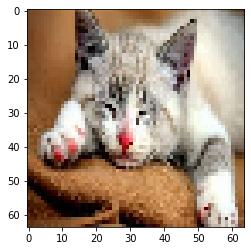

In [15]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from numpy import asarray
# load the image
url='https://th.bing.com/th/id/OIP.AHmAGY1B6WtsjNJohvBVuQHaEK?w=302&h=180&c=7&o=5&dpr=1.25&pid=1.7'
image = Image.open(urllib.request.urlopen(url))
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)
plt.imshow(image2)
image2=image.resize((64, 64))
print(image2.mode)
print(image2.size)
print(asarray(image2).shape)
plt.imshow(image2)
print(loaded_model.predict((asarray(image2)/255).reshape(1,64,64,3)))

In [233]:
class_labels

['cats', 'dogs']